<b><h1 style='text-align:center;'>In the name of God</h1></b>

# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Load data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data - project 1/heart.csv")
df.shape # (rows, columns)

(303, 14)

# Step 1: choose best model for our data: refer to sklearn website
<img src='data - project 1/Scikit-learn-cheat-sheet.png'>

# Step 2: Preparing the tools

<p>we're gonna use pandas, matplotlib and numpy for data analysis and manipulation</p>

In [2]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# this is expired we'll use RocCurveDisplay instead
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay


In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# Step 3: Data Analysis

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with. 

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [5]:
# Let's find out how many of each class there
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

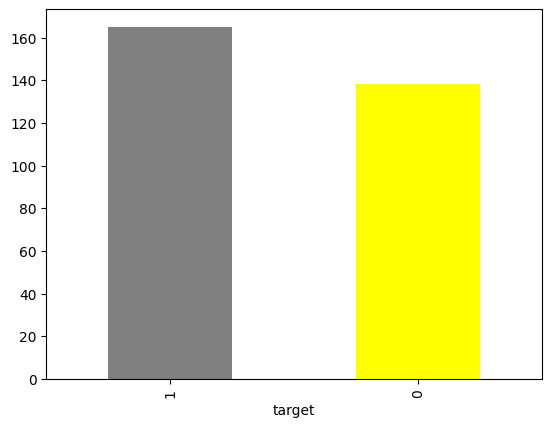

In [6]:
# plot to see how much difference they have
df['target'].value_counts().plot(kind='bar', color=['gray', 'yellow'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()
# we have no missing data in this data set

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex 

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


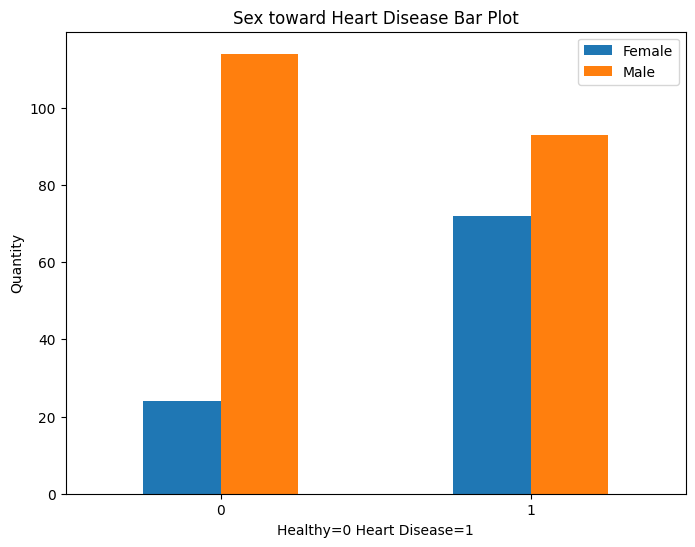

In [12]:
pd.crosstab(df.target, df.sex).plot.bar(figsize=(8, 6))
plt.xlabel('Healthy=0 Heart Disease=1')
plt.ylabel('Quantity')
plt.title('Sex toward Heart Disease Bar Plot')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

In [13]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Finding the patterns
 we want to explore the relation between our features to find patterns

### We have to check our data distribution to avoid outlayers data

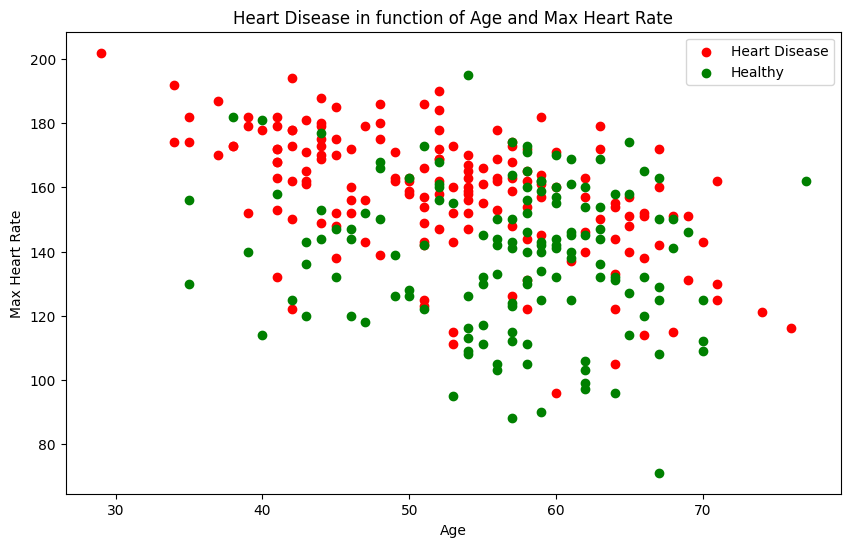

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=df.age[df['target']==1], y=df.thalach[df['target']==1], c='red')
ax.scatter(x=df.age[df['target']==0], y=df.thalach[df['target']==0], c='green')
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(['Heart Disease', 'Healthy'])
plt.show()


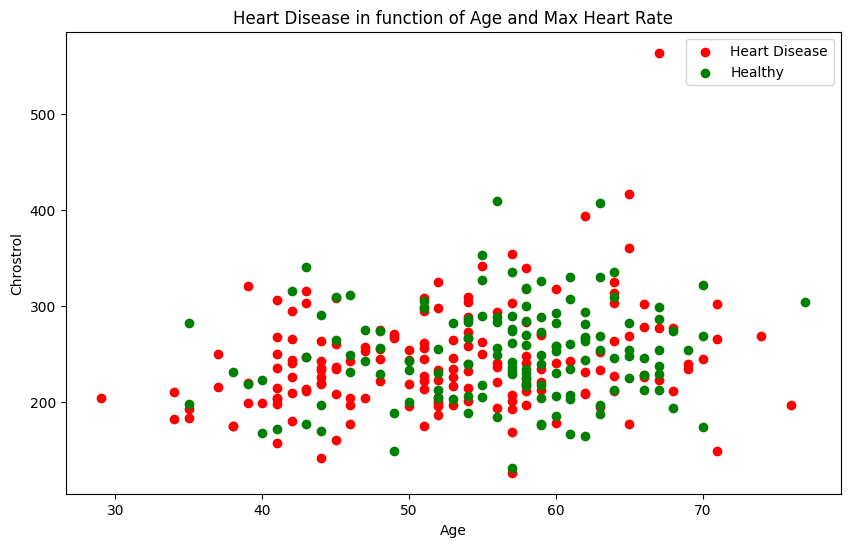

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=df.age[df['target']==1], y=df.chol[df['target']==1], c='red')
ax.scatter(x=df.age[df['target']==0], y=df.chol[df['target']==0], c='green')
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Chrostrol")
plt.legend(['Heart Disease', 'Healthy'])
plt.show()


<Axes: ylabel='Frequency'>

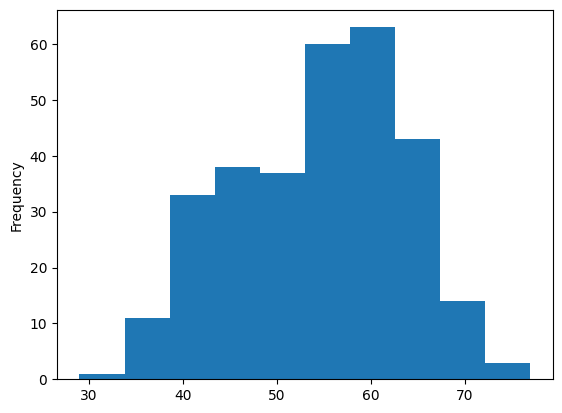

In [16]:
df['age'].plot.hist()
# we'll see the distribution of age, we'll find out that we have a normal distribution on this feature

### Check out the corelation between independent varriables and independent varriables 

In [17]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [18]:
df.exang.value_counts()

exang
0    204
1     99
Name: count, dtype: int64

In [19]:
pd.crosstab(df['exang'], df['target'])

target,0,1
exang,,
0,62,142
1,76,23


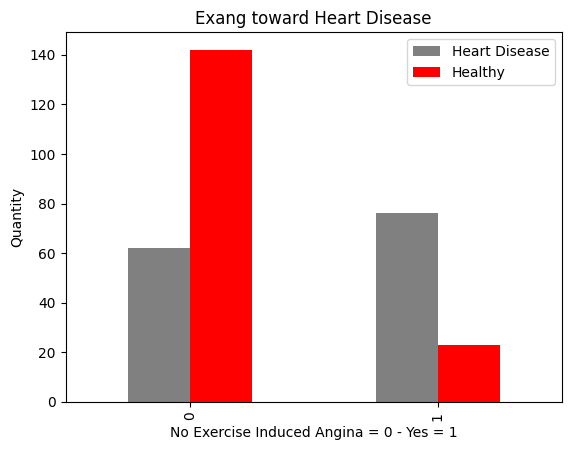

In [20]:
pd.crosstab(df['exang'], df['target']).plot.bar(color=['gray', 'red'])
plt.title('Exang toward Heart Disease')
plt.ylabel('Quantity')
plt.xlabel('No Exercise Induced Angina = 0 - Yes = 1')
plt.legend(['Heart Disease', 'Healthy'])
plt.show()

### corelation matrix: show how data are matches and have relation with another one(like covariance)
the higher positive value means a potential positive correlation and the higher negative value means a potential negative correlation or a decrease
for example positive for row-col : cp - target means higher cp -> target value increases
but negative will lead to when one increase - another decreases

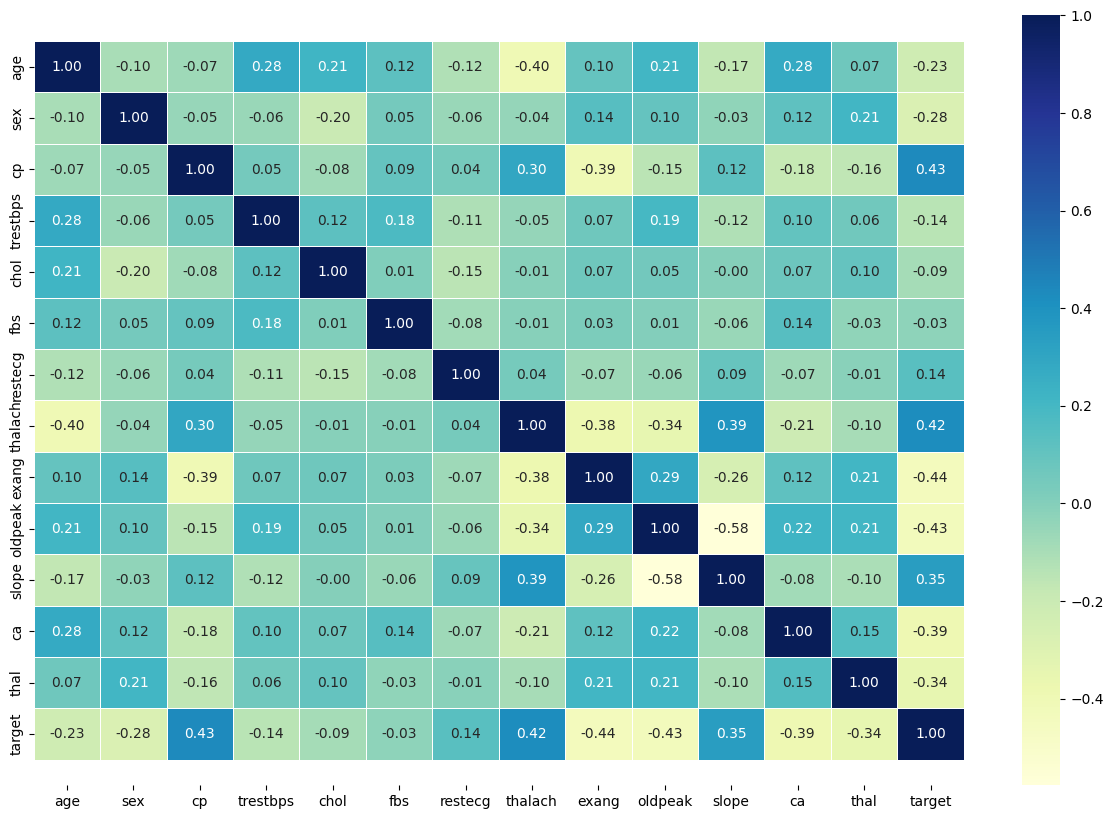

In [21]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

# Step 4 : Modelling

In [22]:
# look at data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# We have to split our data to train and test to evaluate our model on data that our model has'nt seen before
X = df.drop('target', axis=1)
Y = df['target']
X, Y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [24]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression 
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [25]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [26]:
model_scores = fit_and_score(models=models,
                             X_train=x_train,
                             X_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\Mohammad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [27]:
# Logestic Regression has the best score
my_model = models['Logistic Regression']
my_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [28]:
# We'll write a function to evaluate our model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
np.random.seed(42)
def evaluate_pred(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    metric_dict = {'accuracy': accuracy *100, 'f1': f1, 'recall': recall, 'precision': precision}
    return metric_dict

In [29]:
# Take score of our model manualy
my_model.score(x_test, y_test)

0.8852459016393442

In [30]:
# with our evaluate function
y_pred = my_model.predict(x_test)
my_model_evaluate = evaluate_pred(y_test, y_pred)
print(f'Our model validation:\n{my_model_evaluate}')

Our model validation:
{'accuracy': 88.52459016393442, 'f1': np.float64(0.8923076923076924), 'recall': np.float64(0.90625), 'precision': np.float64(0.8787878787878788)}


### It is possible the models what you want for your data are not in sklearn map so you have to search for it

#### Search for how to tuning our model(by name of model) and evaluate it

# Step 5: Improve our model(Tuning kneighbor and another models hyperparameters)

## Change Hyperparameters to improve our model
### 1. By hand
### 2. By RandomizedSearchCV
### 3. By GridSearchCV

In [31]:
# 1. By hand
k_neighbors = range(1, 30, 1)
train_scores, test_scores = [], []
for k in k_neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    # fitting our model to train data
    model.fit(x_train, y_train)
    # add the score of train and test of our model
    train_scores.append(model.score(x_train, y_train))
    test_scores.append(model.score(x_test, y_test))

print('Train sccores:\n', train_scores)
print('Test sccores:\n', test_scores)


Train sccores:
 [1.0, 0.8099173553719008, 0.7727272727272727, 0.743801652892562, 0.7603305785123967, 0.7520661157024794, 0.743801652892562, 0.7231404958677686, 0.71900826446281, 0.6942148760330579, 0.7272727272727273, 0.6983471074380165, 0.6900826446280992, 0.6942148760330579, 0.6859504132231405, 0.6735537190082644, 0.6859504132231405, 0.6652892561983471, 0.6818181818181818, 0.6694214876033058, 0.6859504132231405, 0.6694214876033058, 0.7024793388429752, 0.6735537190082644, 0.6983471074380165, 0.6942148760330579, 0.6983471074380165, 0.6859504132231405, 0.6818181818181818]
Test sccores:
 [0.6229508196721312, 0.639344262295082, 0.6557377049180327, 0.6721311475409836, 0.6885245901639344, 0.7213114754098361, 0.7049180327868853, 0.6885245901639344, 0.6885245901639344, 0.7049180327868853, 0.7540983606557377, 0.7377049180327869, 0.7377049180327869, 0.7377049180327869, 0.6885245901639344, 0.7213114754098361, 0.6885245901639344, 0.6885245901639344, 0.7049180327868853, 0.6557377049180327, 0.70491

We've reached 75.41% as max score on test data


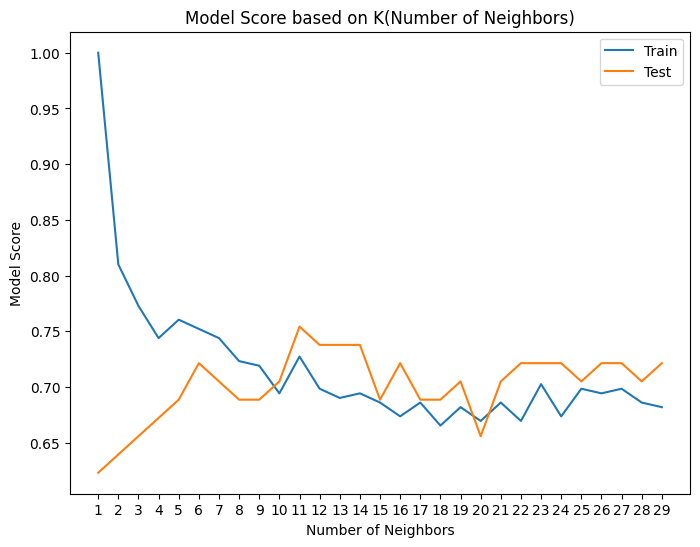

In [32]:
# plot scores to figure out details
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(k_neighbors, train_scores)
ax.plot(k_neighbors, test_scores)
plt.title('Model Score based on K(Number of Neighbors)')
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.xticks(k_neighbors)
plt.legend(['Train', 'Test'])
print(f"We've reached {max(test_scores) * 100:.2f}% as max score on test data")
plt.show()

### 2. By randomizedsearchcv


In [33]:
# Lets tune our RandomForestClassifier Model
np.random.seed(42)
rfc_grid = {
    'n_estimators': np.arange(100, 1000, 50),
    "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)
}
rfc_random = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rfc_grid, n_iter=10, cv=5, verbose=2)
rfc_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=800; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=800; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_de

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950])},
                   verbose=2)

In [34]:
rfc_random.score(x_test, y_test)

0.8688524590163934

In [35]:
rfc_random.best_params_

{'n_estimators': np.int64(150),
 'min_samples_split': np.int64(14),
 'min_samples_leaf': np.int64(17),
 'max_depth': 10}

### 3. By gridsearchcv


In [36]:
#search for best model with GridSearchCV(it will test model with different given hyperparaneters exhustly)
np.random.seed(42)

gridcv = {
    'solver': ['liblinear'],
    'C': np.logspace(-4, 4, 20),
}
chosen_grid = GridSearchCV(LogisticRegression(), param_grid=gridcv, cv=5, verbose=2)
chosen_grid.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=2)

In [37]:
print(chosen_grid.score(x_test, y_test), chosen_grid.best_params_, sep='\n')

0.8852459016393442
{'C': np.float64(0.23357214690901212), 'solver': 'liblinear'}


In [38]:
best_model = LogisticRegression(C=np.float64(0.23357214690901212), solver='liblinear')
best_model.fit(x_train, y_train)
best_model.score(x_test, y_test)

0.8852459016393442

In [39]:
y_pred = best_model.predict(x_test)
print(evaluate_pred(y_test, y_pred))

{'accuracy': 88.52459016393442, 'f1': np.float64(0.8923076923076924), 'recall': np.float64(0.90625), 'precision': np.float64(0.8787878787878788)}


## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [40]:
# let's lock at confusion matrix
conf = confusion_matrix(y_test, y_pred)
print(conf)

[[25  4]
 [ 3 29]]


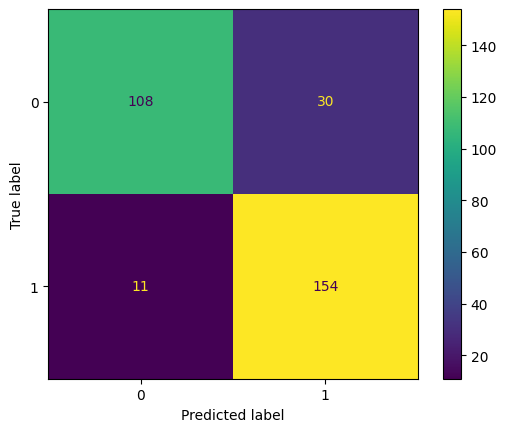

In [41]:
# create confusion matrix by from_estimator method with all data
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X, Y);

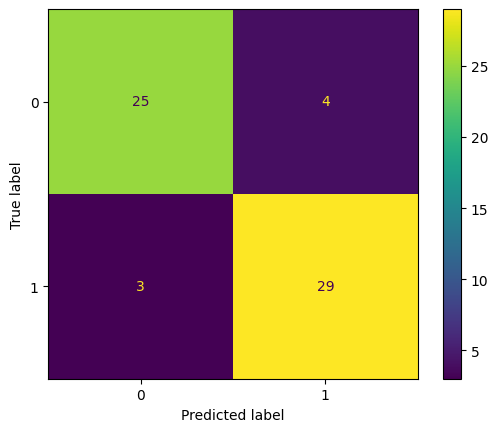

In [42]:
# create confusion matrix by from_predictions method with test data
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

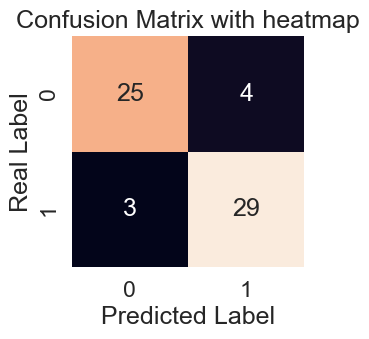

In [43]:
sns.set(font_scale=1.5)
# create confusion matrix by sns.heatmap method with test data
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, y_pred), 
           annot=True,
           cbar=False)
plt.title('Confusion Matrix with heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('Real Label')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom, top)
plt.show()

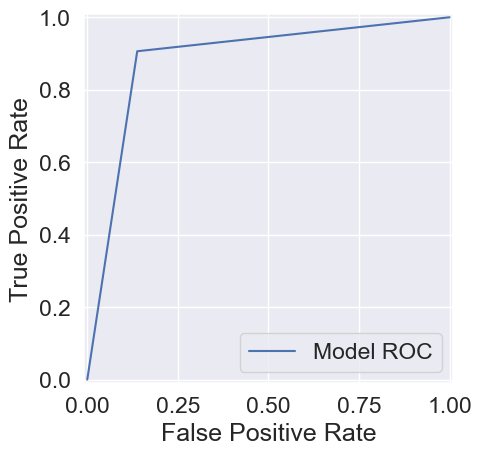

In [44]:
from sklearn.metrics import roc_curve
# roc curve
# first we have to get false positive rate(fpr), true positive rate(tpr) and threshold
fpr, tpr, threshild = roc_curve(y_test, y_pred)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=None, estimator_name='Model ROC')
display.plot();

In [46]:
from sklearn.metrics import classification_report
classification_report_ = classification_report(y_test, y_pred)
print(classification_report_)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [46]:
# Let's look at validation with cross validation
# we'll use None as scoring parameter
np.random.seed(42)
cross_validation = cross_val_score(best_model, X, Y, cv=5, scoring=None)
cross_validation_mean = np.mean(cross_validation)
print(f'Model Validation Percentage: {cross_validation_mean} % ')

Model Validation Percentage: 0.8479781420765027 % 


In [47]:
# note that we've searched about scoring parameters for a Classification Problem
np.random.seed(42)
cross_validation = cross_val_score(best_model, X, Y, cv=5, scoring='accuracy')
mean_accuracy = np.mean(cross_validation)
print(f'Model Validation Accuracy Percentage: {mean_accuracy} % ')

Model Validation Accuracy Percentage: 0.8479781420765027 % 


In [48]:
# use different values for scoring parameter
np.random.seed(42)
cross_validation = cross_val_score(best_model, X, Y, cv=5, scoring='f1')
mean_f1 = np.mean(cross_validation)
print(f'Model Validation f1 Percentage: {mean_f1} % ')

Model Validation f1 Percentage: 0.8705403543192143 % 


In [49]:
# use different values for scoring parameter
np.random.seed(42)
cross_validation = cross_val_score(best_model, X, Y, cv=5, scoring='recall')
mean_recall = np.mean(cross_validation)
print(f'Model Validation recall Percentage: {mean_recall} % ')

Model Validation recall Percentage: 0.9272727272727274 % 


In [50]:
# use different values for scoring parameter
np.random.seed(42)
cross_validation = cross_val_score(best_model, X, Y, cv=5, scoring='precision')
mean_precision = np.mean(cross_validation)
print(f'Model Validation precision Percentage: {mean_precision} % ')

Model Validation precision Percentage: 0.8215873015873015 % 


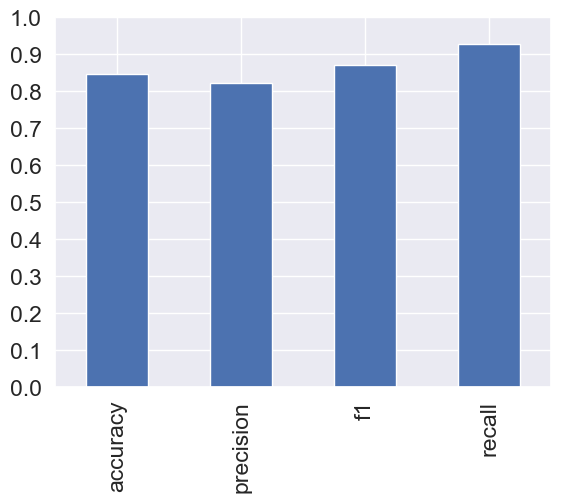

In [51]:
# Visualize Scoring Parameters
scoring_parameters = pd.DataFrame({'accuracy': mean_accuracy, 
                                  'precision': mean_precision,
                                  'f1': mean_f1,
                                  'recall': mean_recall},
                                 index=[0])
plt.xticks
scoring_parameters.T.plot(kind='bar', legend=False, yticks=np.arange(0, 1.1, 0.1));

### Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [63]:
# check coef_ of our best model
# this matrix shows relation between every feature and target label
best_model.coef_

array([[ 0.00369922, -0.90424096,  0.67472824, -0.0116134 , -0.00170364,
         0.04787687,  0.33490206,  0.02472938, -0.63120412, -0.57590985,
         0.4709516 , -0.65165345, -0.69984214]])

In [64]:
# Let's get features and coef together
features_coef = dict(zip(df.columns, best_model.coef_[0]))
print(features_coef)

{'age': np.float64(0.00369922271969309), 'sex': np.float64(-0.9042409571824147), 'cp': np.float64(0.6747282417003583), 'trestbps': np.float64(-0.01161339887501955), 'chol': np.float64(-0.0017036434876667307), 'fbs': np.float64(0.04787687234653053), 'restecg': np.float64(0.3349020564037549), 'thalach': np.float64(0.024729381484044546), 'exang': np.float64(-0.6312041160762268), 'oldpeak': np.float64(-0.575909845192967), 'slope': np.float64(0.4709515998265588), 'ca': np.float64(-0.6516534466903441), 'thal': np.float64(-0.6998421437724929)}


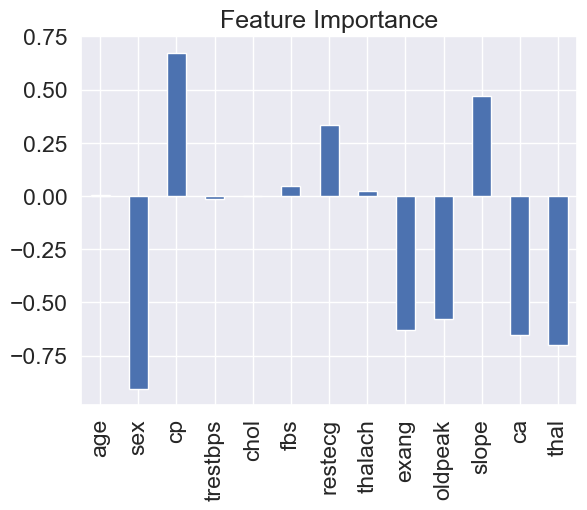

In [66]:
# Visualize feature importance
feature_df = pd.DataFrame(features_coef, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [67]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [69]:
pd.crosstab(df["slope"], df["target"])
# ressult shows that slope has positive relation to target and this is what we've seen in coef matrix

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart
> it's very related to target based on the definition in the first of project

# Step 6:  Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?

<b><h1 style='text-align:center;'>The End</h1></b>